In [1]:
import pandas as pd
import numpy as np

In [2]:
path='C:/Users/GTE_Forschung_3/Desktop/mathieu/python/github_repos/Udacity_intro_data_analysis/lesson3'
path='C:/Users/GTE_Forschung_1/Desktop/0_TUberlin/17_programming/github_repos/Udacity_intro_data_analysis/lesson3'
file_name='nyc_subway_weather.csv'
full_path=path+"/"+file_name
#subway_df=pd.read_csv(full_path,index_col='datetime' )
subway_df=pd.read_csv(full_path)
num_row,num_col=subway_df.shape
print('there is {} rows and {} cols in this df'.format(num_row,num_col))
#subway_df.drop(['DATEn','TIMEn'],axis=1, inplace=True)
subway_df.head()


FileNotFoundError: [Errno 2] File b'C:/Users/GTE_Forschung_1/Desktop/0_TUberlin/17_programming/github_repos/Udacity_intro_data_analysis/lesson3/nyc_subway_weather.csv' does not exist: b'C:/Users/GTE_Forschung_1/Desktop/0_TUberlin/17_programming/github_repos/Udacity_intro_data_analysis/lesson3/nyc_subway_weather.csv'

In [ ]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits-entries_and_exits.shift(1)

In [359]:
hourly_for_group

<function __main__.hourly_for_group(entries_and_exits)>

In [360]:
#ubway_df['ENTRIESn'].shift(-1,fill_value=0).head(10)

In [361]:
print(len(subway_df.station.unique()))
#print(df.station.unique())

207


In [362]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])


In [363]:
station=ridership[0,:].argmax()
overall_mean = ridership[:,:].mean() # Replace this with your code
mean_for_max = ridership[:,station].mean() # Replace this with your code
print(station, overall_mean, mean_for_max)

3 2342.6 3239.9


In [364]:
ridership.mean(axis=0).max()
ridership.mean(axis=0).min()

1071.2

In [365]:
overall_mean

2342.6

In [366]:
mean_for_max

3239.9

In [367]:
lt= [1478, 3877, 3674, 2328, 2539]

In [368]:
np.mean(lt)

2779.2

In [369]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)


In [370]:
station=ridership_df.iloc[0].idxmax()
overall_mean = ridership_df.values.mean() # Replace this with your code
mean_for_max = ridership_df[station].mean() # Replace this with your code

In [371]:
print(station, overall_mean, mean_for_max)

R006 2342.6 3239.9


In [372]:
def standardize_data(x):
    return (x-x.mean())/x.std(ddof=0)

def correlation(x, y):
    return (standardize_data(x)*standardize_data(y)).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))
print(correlation(entries, cum_entries))


# result -> 0-0.2: weak corr, 0.3-0.6: Moderate corr, 0.7-1: Strong corr
# doc: https://pythonfordatascience.org/correlation-python/#assumptions
#x = pd.Series([1, 2, 3, 4])
#y = pd.Series([10, 11, 12, 13])
#print(correlation(x, y)) # answer schould be 1



0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


In [373]:
a = np.array([1,2,3,4,6,7,8,9])
b = np.array([2,4,6,8,10,12,13,15])
c = np.array([-1,-2,-2,-3,-4,-6,-7,-8])
np.corrcoef([a,b,c])


array([[ 1.        ,  0.99535001, -0.9805214 ],
       [ 0.99535001,  1.        , -0.97172394],
       [-0.9805214 , -0.97172394,  1.        ]])

In [374]:
def find_pearson_correlation(var='EXITSn',min_r=0.5):
    ''' returns a list of correlation for a given var
    inputs:
        - Var (string) : variable that is investigated
        - min_r (float) : min r pearson for coorelation to be relevant
    returns:
        - list of correlation and associated   r pearson
    default input
        - var = 'EXITSn'
        - min_r=0.6
    examples:
        - find_pearson_correlation() #for default value
        - find_pearson_correlation('EXITSn',0.7)
        - find_pearson_correlation('EXITSn',0.5)
        
        
    ''' 
    if type(var)!=str:
        print('the variable must be between " " or ' ' and be a string')
    else:
        # determine the r_pearson coorelation matrix
        corr_pearson=subway_df.corr(method='pearson')
        # get correlation at min_r
        my_strong_corr={} 
        for col in corr_pearson.columns:
            for row in corr_pearson.index:
                if row==col:
                    break
                else:
                    if abs(corr_pearson.loc[row, col])>=min_r and abs(corr_pearson.loc[row, col])<1:
                        corr=(row,col)
                        my_strong_corr[corr]=round(corr_pearson.loc[row, col],6)
                        
         # get the correlation involving the given var               
        my_corr=[]
        for i in range(len(list(my_strong_corr.keys()))):
            if var in list(my_strong_corr.keys())[i]:
                my_corr.append(list(my_strong_corr.keys())[i])
                
        my_related_corr={}
        for corr in my_corr:
            my_related_corr[corr]=my_strong_corr[corr]
        return my_related_corr
            

In [375]:
find_pearson_correlation()

{('ENTRIESn', 'EXITSn'): 0.924739,
 ('EXITSn', 'ENTRIESn_hourly'): 0.552648,
 ('EXITSn', 'EXITSn_hourly'): 0.58213}

In [376]:
corr_mat=subway_df.corr(method='pearson')
my_strong_corr={} 
for col in corr_mat.columns:
    for row in corr_mat.index:
        if row==col:
            break
        else:
            if abs(corr_mat.loc[row, col])>=0.5:
                corr=(row,col)
                my_strong_corr[corr]=round(corr_mat.loc[row, col],3)
my_strong_corr

{('ENTRIESn', 'EXITSn'): 0.925,
 ('ENTRIESn', 'ENTRIESn_hourly'): 0.586,
 ('EXITSn', 'ENTRIESn_hourly'): 0.553,
 ('ENTRIESn', 'EXITSn_hourly'): 0.531,
 ('EXITSn', 'EXITSn_hourly'): 0.582,
 ('ENTRIESn_hourly', 'EXITSn_hourly'): 0.64,
 ('day_week', 'weekday'): -0.806,
 ('precipi', 'meanprecipi'): 0.633,
 ('rain', 'meanprecipi'): 0.524,
 ('pressurei', 'meanpressurei'): 0.951,
 ('tempi', 'meantempi'): 0.821,
 ('longitude', 'meanwspdi'): 0.502,
 ('wspdi', 'meanwspdi'): 0.705,
 ('latitude', 'weather_lat'): 0.974,
 ('longitude', 'weather_lon'): 0.953}

In [377]:
len(subway_df.columns)
subway_df.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

In [378]:
find_pearson_correlation('ENTRIESn_hourly',0.)


{('ENTRIESn', 'ENTRIESn_hourly'): 0.585895,
 ('EXITSn', 'ENTRIESn_hourly'): 0.552648,
 ('ENTRIESn_hourly', 'EXITSn_hourly'): 0.640267,
 ('ENTRIESn_hourly', 'hour'): 0.286798,
 ('ENTRIESn_hourly', 'day_week'): -0.094897,
 ('ENTRIESn_hourly', 'weekday'): 0.145431,
 ('ENTRIESn_hourly', 'latitude'): 0.115635,
 ('ENTRIESn_hourly', 'longitude'): -0.124047,
 ('ENTRIESn_hourly', 'fog'): -0.00859,
 ('ENTRIESn_hourly', 'precipi'): -0.027682,
 ('ENTRIESn_hourly', 'pressurei'): -0.033361,
 ('ENTRIESn_hourly', 'rain'): 0.025825,
 ('ENTRIESn_hourly', 'tempi'): 0.089596,
 ('ENTRIESn_hourly', 'wspdi'): 0.05603,
 ('ENTRIESn_hourly', 'meanprecipi'): 0.035649,
 ('ENTRIESn_hourly', 'meanpressurei'): -0.006186,
 ('ENTRIESn_hourly', 'meantempi'): -0.026693,
 ('ENTRIESn_hourly', 'meanwspdi'): -0.039724,
 ('ENTRIESn_hourly', 'weather_lat'): 0.089156,
 ('ENTRIESn_hourly', 'weather_lon'): -0.137889}

In [379]:
find_pearson_correlation('rain',0.)

{('ENTRIESn', 'rain'): -0.002044,
 ('EXITSn', 'rain'): -0.003339,
 ('ENTRIESn_hourly', 'rain'): 0.025825,
 ('EXITSn_hourly', 'rain'): 0.024134,
 ('hour', 'rain'): -0.000697,
 ('day_week', 'rain'): -0.08249,
 ('weekday', 'rain'): 0.130846,
 ('latitude', 'rain'): 0.003906,
 ('longitude', 'rain'): 0.000133,
 ('fog', 'rain'): 0.144566,
 ('precipi', 'rain'): 0.331453,
 ('pressurei', 'rain'): -0.349881,
 ('rain', 'tempi'): -0.263788,
 ('rain', 'wspdi'): 0.151034,
 ('rain', 'meanprecipi'): 0.52385,
 ('rain', 'meanpressurei'): -0.367976,
 ('rain', 'meantempi'): -0.321441,
 ('rain', 'meanwspdi'): 0.214222,
 ('rain', 'weather_lat'): 0.003483,
 ('rain', 'weather_lon'): 0.000122}

In [380]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
    
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def convert(grade):
        if grade>=90:
            new_grade='A'
        elif grade>=80 and grade<90:
            new_grade='B'
        elif grade>=70 and grade<80:
            new_grade='C'
        elif grade>=60 and grade<70:
            new_grade='D'
        elif grade<60:
            new_grade='F'
        return new_grade
            
    return grades.applymap(convert)

In [381]:
convert_grades(grades_df)


,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [382]:
def standardize_data(x):
    return (x-x.mean())/x.std(ddof=0)

In [383]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [384]:
grades_df.apply(standardize_data)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [385]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def transform (col):       
        return col.sort_values(ascending=False, inplace=False).iloc[1]
    
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''  
    return df.apply(transform)

In [386]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

In [387]:
(df.max()-df).min()

a    0
b    0
c    0
dtype: int64

In [388]:
df[df==df.max()]=0


In [389]:
df.max()


a     4
b    40
c    20
dtype: int64

In [390]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''    
    return (df-df.mean())/df.std()

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    return df.sub(df.mean(axis=1),axis=0).div(df.std(axis=1),axis=0)
#print(standardize_rows(grades_df))
#print(standardize(grades_df))

Populating the interactive namespace from numpy and matplotlib


0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

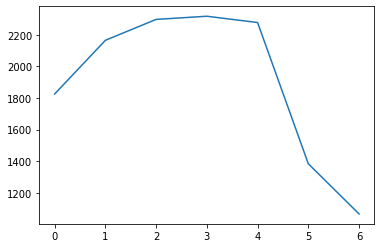

In [392]:
a=subway_df.groupby('day_week',as_index=False).mean()['ENTRIESn_hourly']
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(a)
a.head(7)

In [398]:
b=subway_df.groupby('rain')['ENTRIESn_hourly']



In [181]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})


def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    
    return entries_and_exits.groupby('UNIT')[['ENTRIESn','EXITSn']].apply(hourly_for_group)

In [182]:
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [190]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'date': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    
    return subway_df.merge(weather_df,left_on=['DATEn','hour','latitude','longitude'],right_on=['date','hour','latitude','longitude'],how='inner')

In [191]:
combine_dfs(subway_df, weather_df)

,UNIT,DATEn,hour,ENTRIESn,EXITSn,latitude,longitude,date,pressurei,fog,rain,tempi,wspdi
0,R003,05-01-11,0,4388333,2911002,40.689945,-73.872564,05-01-11,30.24,0,0,52.0,8.1
1,R003,05-02-11,0,4388348,2911036,40.689945,-73.872564,05-02-11,30.32,0,0,48.9,6.9
2,R003,05-03-11,0,4389885,2912127,40.689945,-73.872564,05-03-11,30.14,0,0,54.0,3.5
3,R003,05-04-11,0,4391507,2913223,40.689945,-73.872564,05-04-11,29.98,0,0,57.2,15.0
4,R003,05-05-11,0,4393043,2914284,40.689945,-73.872564,05-05-11,30.01,0,0,48.9,15.0
5,R004,05-01-11,0,14656120,14451774,40.691320,-73.867135,05-01-11,30.24,0,0,52.0,8.1
6,R004,05-02-11,0,14656174,14451851,40.691320,-73.867135,05-02-11,30.32,0,0,48.9,6.9
7,R004,05-03-11,0,14660126,14454734,40.691320,-73.867135,05-03-11,30.14,0,0,54.0,3.5
8,R004,05-04-11,0,14664247,14457780,40.691320,-73.867135,05-04-11,29.98,0,0,57.2,15.0
9,R004,05-05-11,0,14668301,14460818,40.691320,-73.867135,05-05-11,30.01,0,0,48.9,15.0
